In [67]:
'analysis_results.pkl'
import pandas as pd
import pickle

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots


In [69]:
from tabulate import tabulate

In [70]:
import numpy as np

In [71]:
plt.style.use('science')
plt.rcParams['figure.figsize'] = [3.54, 2.36]
dpi = 100
plt.rcParams['savefig.dpi'] = dpi
plt.rcParams['figure.dpi'] = dpi


In [72]:
analysis_results = pd.read_pickle('analysis_results.pkl')

In [73]:
detector_readings = pd.read_pickle('../Data/DetectorReadings.pkl')

In [74]:
analysis_results

,mse,r2,slope,intercept,fitting_df,carbon_fitting_df,si_fitting_df,c_lines_df,si_lines_df,peak_areas,...,training_carbon_portions,test_carbon_portions,decomposed_df,history,training_x,training_y,test_x,test_y,x_hat,id
0,3.478153e-02,0.974642,1.871084e+06,-5.773544e-01,Carbon Peak...,labels Base...,labels Base...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.299171391865342e-07, 2.892743756950564e-07,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.423105e-02,0.999809,1.354549e+06,-4.142088e-02,Carbon Peak...,labels Baseli...,labels Base...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.1604557774055466e-08, 2.6202205515086672e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.915231e-02,0.993369,6.219761e+10,-3.109881e+10,average_min...,NaN,NaN,NaN,NaN,NaN,...,"[0.4999999999923334, 0.4999999999917018, 0.499...","[0.4999999999923334, 0.4999999999917018, 0.499...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1.924774e-02,0.993219,4.060983e+10,-5.076228e+09,7x7x7_Si_001000 ...,NaN,NaN,NaN,NaN,NaN,...,"[0.12499999999824978, 0.12499999999727293, 0.1...","[0.12499999999824978, 0.12499999999727293, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,6.716519e-02,0.949408,1.064833e+04,-5.795854e-01,Carbon Peak...,NaN,NaN,NaN,NaN,"[5.492738941346543e-05, 4.6137440215711224e-05...",...,NaN,NaN,2.00574 2...,NaN,NaN,NaN,NaN,NaN,NaN,4
5,9.758396e-02,0.031370,-3.024701e+04,-5.589687e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[-0.00018331374, -0.00018876337, -0.0001887247...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[-0.00018331374, -0.00018876337, -0.0001887247...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.11983976299825905, 0.11867071961102393...",5
6,9.813381e-02,0.043798,-5.066993e+06,-1.053304e+03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[-0.00020791031, -0.00020787166, -0.0002079119...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[-0.00020791031, -0.00020787166, -0.0002079119...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.175997425997366, 0.0, 0.1842556842555041, 0...",6
7,9.809844e-04,0.139337,5.439926e+05,-4.792843e-02,Carbon Peak...,labels Basel...,labels Basel...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[1.9694317498162525e-07, 1.3839137148555722e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
8,1.036624e-04,0.909237,9.108838e+05,-2.769997e-02,Carbon Peak...,labels Baselin...,labels Basel...,bins 7x7x7_Silica_001014 baseline 7x7...,bins 7x7x7_Silica_001014 baseline 7x7...,"[3.687820774942502e-08, 3.072013422055157e-08,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
9,5.726779e-04,0.641049,9.120826e+11,-4.560413e+10,average_min...,NaN,NaN,NaN,NaN,NaN,...,"[0.049999999999982954, 0.04999999999994773, 0....","[0.049999999999982954, 0.04999999999994773, 0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [75]:
figure_folder = '../../Figures/Analysis/'

In [76]:
def all_results_table(analysis_results, focus=None):
    """
    Create a table of all results from the analysis_results DataFrame.
    """
    cols = ['method group', 'method', 'carbon level', 'datasets used']
    if focus:
        if isinstance(focus, str):
            cols = [focus]
        elif isinstance(focus, list):
            cols = focus
    print(tabulate(
        analysis_results[cols + ['mse']].sort_values(by=['mse']), 
        headers='keys',
        showindex=False,
        tablefmt='github',
            ))

In [77]:
def explode_and_graph(analysis_results, x_col, y_col, title, xlabel, ylabel, filename, hue=None, style=None):
    """
    Explode the DataFrame and create a scatter plot.
    """
    explode_vals_df = analysis_results.copy()
    explode_vals_df = explode_vals_df.explode([x_col, y_col], ignore_index=True)
    
    plt.figure(figsize=[3.54, 5.54])
    sns.scatterplot(data=explode_vals_df, x=x_col, y=y_col, alpha=.9, hue=hue, style=style)
    max_x = explode_vals_df[x_col].max()
    plt.plot([0, max_x], [0, max_x], color='gray', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.gca().set_aspect('equal')
    plt.legend(
        fontsize=6
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # make x and y axis percentage notation
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    plt.tight_layout()
    plt.savefig(figure_folder + filename, bbox_inches='tight')
    plt.show()

In [78]:
def explode_and_graph_other(analysis_results, x_col, y_col, title, xlabel, ylabel, filename, hue=None, style=None):
    """
    Explode the DataFrame and create a scatter plot.
    """
    explode_vals_df = analysis_results.copy()
    explode_vals_df = explode_vals_df.explode([x_col, y_col], ignore_index=True)
    
    plt.figure(figsize=[3.54, 5.54])
    sns.scatterplot(data=explode_vals_df, x=x_col, y=y_col, alpha=.9, hue=hue, style=style)
    max_x = explode_vals_df[x_col].max()
    # plt.plot([0, max_x], [0, max_x], color='gray', linestyle='--', linewidth=2, label='Ideal Fit')
    # plt.gca().set_aspect('equal')
    plt.legend(
        fontsize=6
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # make x and y axis percentage notation
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    plt.tight_layout()
    plt.savefig(figure_folder + filename, bbox_inches='tight')
    plt.show()

# all

In [79]:
best_results = analysis_results.copy()
best_results = best_results.sort_values(by=['mse'])
best_results = best_results[best_results['datasets used']=='Material Mixes']
best_results = best_results[best_results['carbon level'] == 'Agricultural']

In [80]:
all_results_table(best_results.head(), focus=['method group', 'method'])

| method group       | method                                                   |         mse |
|--------------------|----------------------------------------------------------|-------------|
| Peak Fitting       | Baseline and Peak Fitting - Exponential Falloff Baseline | 0.000103662 |
| Component Analysis | Component Analysis - Elemental Maps                      | 0.00028756  |
| nan                | Convex Optimization                                      | 0.000357869 |
| Component Analysis | Component Analysis - Average Training                    | 0.000572678 |
| Peak Fitting       | Baseline and Peak Fitting - linear Baseline              | 0.000980984 |


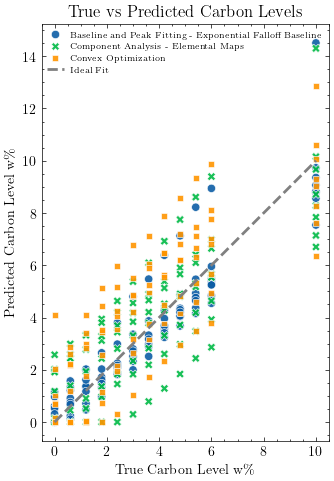

In [81]:
explode_and_graph(best_results.head(3), 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Levels',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%', 
                   'true_vs_predicted_carbon.png', style='method', hue='method')

In [82]:
carbon_level_results = analysis_results.copy()
carbon_level_results = carbon_level_results.sort_values(by=['mse'])
carbon_level_results = carbon_level_results[carbon_level_results['datasets used']=='Material Mixes']

In [83]:
print(carbon_level_results[['carbon level', 'method', 'mse']].pivot(index='carbon level', columns='method', values='mse').to_markdown())

| carbon level   |   Baseline and Peak Fitting - Exponential Falloff Baseline |   Baseline and Peak Fitting - linear Baseline |   Component Analysis - Average Training |   Component Analysis - Elemental Maps |   Convex Optimization |   Filtered Machine Learning |   Machine Learning |
|:---------------|-----------------------------------------------------------:|----------------------------------------------:|----------------------------------------:|--------------------------------------:|----------------------:|----------------------------:|-------------------:|
| Agricultural   |                                                0.000103662 |                                   0.000980984 |                             0.000572678 |                            0.00028756 |           0.000357869 |                  0.00653481 |         0.00106982 |
| All            |                                                0.014231    |                                   0.0347815   |                  

In [84]:
all_carbon_level_results = analysis_results.copy()
all_carbon_level_results = all_carbon_level_results.sort_values(by=['mse'])
all_carbon_level_results = all_carbon_level_results[all_carbon_level_results['datasets used']=='Material Mixes']
all_carbon_level_results = all_carbon_level_results[all_carbon_level_results['carbon level'] == 'All']

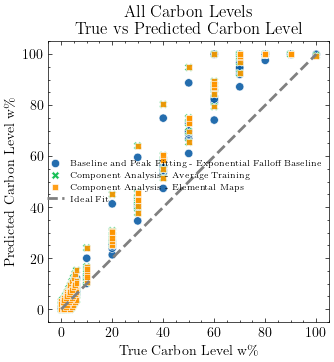

In [85]:
explode_and_graph(all_carbon_level_results.head(3), 'true_carbon', 'predicted_carbon', 
                   'All Carbon Levels\nTrue vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_component_analysis.jpg',
                   hue='method', style='method')

In [86]:
dataset_results = analysis_results.copy()
dataset_results = dataset_results.sort_values(by=['mse'])
dataset_results = dataset_results[dataset_results['carbon level'] == 'Agricultural']
print(dataset_results[['datasets used', 'method', 'mse']].pivot(index='datasets used', columns='method', values='mse').to_markdown())

| datasets used        |   Baseline and Peak Fitting - Exponential Falloff Baseline |   Baseline and Peak Fitting - linear Baseline |   Component Analysis - Average Training |   Component Analysis - Elemental Maps |   Convex Optimization |   Filtered Machine Learning |   Machine Learning |
|:---------------------|-----------------------------------------------------------:|----------------------------------------------:|----------------------------------------:|--------------------------------------:|----------------------:|----------------------------:|-------------------:|
| Convolution Training |                                                0.000100161 |                                   0.00065535  |                             0.000453953 |                           0.000261062 |           0.000247903 |                 0.000706433 |        0.000704499 |
| Feldspar             |                                                2.46556e-05 |                                   0.00398

# Baseline - Peak Fitting

In [87]:
peak_analysis_results = analysis_results[analysis_results['method group']=='Peak Fitting']
peak_analysis_results = peak_analysis_results.sort_values(by=['mse'])
peak_analysis_results = peak_analysis_results[peak_analysis_results['datasets used']=='Material Mixes']
peak_analysis_results = peak_analysis_results[peak_analysis_results['carbon level'] == 'Agricultural']

In [88]:
all_results_table(peak_analysis_results, focus=['method'])

| method                                                   |         mse |
|----------------------------------------------------------|-------------|
| Baseline and Peak Fitting - Exponential Falloff Baseline | 0.000103662 |
| Baseline and Peak Fitting - linear Baseline              | 0.000980984 |


In [89]:
_fit_df = peak_analysis_results.fitting_df.iloc[0].copy()
_fit_df.reset_index(drop=False, inplace=True)
_fit_df['material1'] = _fit_df.label.apply(lambda x: x.split('_')[1])
_fit_df['material2'] = _fit_df.label.apply(lambda x: x.split('_')[-3])
_fit_df['material'] = _fit_df['material1'].where(_fit_df['material1'] != 'C', _fit_df['material2'])

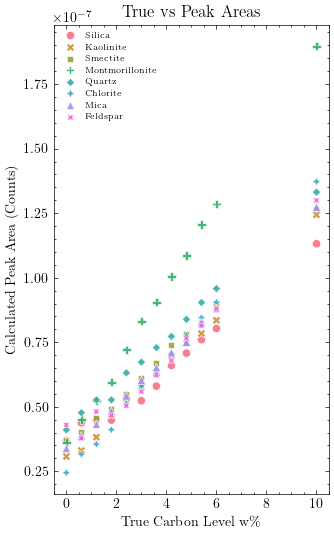

In [90]:
explode_and_graph_other(peak_analysis_results.iloc[0:1], 'true_carbon', 'peak_areas', 
                   'True vs Peak Areas',
                   'True Carbon Level w\%', 'Calculated Peak Area (Counts)',
                   'carbon_level_vs_predicted_pf.jpg',
                   hue=_fit_df['material'],style=_fit_df['material'])

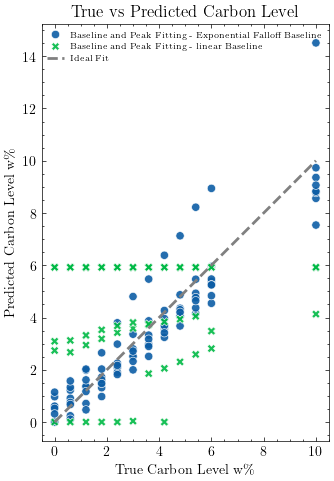

In [91]:
explode_and_graph(peak_analysis_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted.jpg',
                   hue='method',style='method')

In [92]:
peak_analysis_results.method.unique()

array(['Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Baseline and Peak Fitting - linear Baseline'], dtype=object)

In [93]:
focus_df = peak_analysis_results[peak_analysis_results['method']=='Baseline and Peak Fitting - Exponential Falloff Baseline'].sort_values(by='mse')

_fit_df = focus_df.fitting_df.iloc[0].copy()
_fit_df.reset_index(drop=False, inplace=True)
_fit_df['material1'] = _fit_df.label.apply(lambda x: x.split('_')[1])
_fit_df['material2'] = _fit_df.label.apply(lambda x: x.split('_')[-3])
_fit_df['material'] = _fit_df['material1'].where(_fit_df['material1'] != 'C', _fit_df['material2'])

c_lines_df = focus_df['c_lines_df'].iloc[0]
bins = c_lines_df['bins']
_fit_df['lines'] = [c_lines_df.filter(like=label) for label in _fit_df.label]

_fit_df['true_carbon'] = focus_df['true_carbon'].iloc[0]

In [94]:
_fit_df

,label,Carbon Peak Area,Carbon Peak Area Error,Silicone Peak Area,Silicone Peak Area Error,material1,material2,material,lines,true_carbon
0,7x7x7_Silica_001014,3.687821e-08,4.236869e-08,1.969432e-07,3.778481e-07,Silica,7x7x7,Silica,7x7x7_Silica_001014 baseline 7x7x7_Silica...,0.000
1,7x7x7_Kaolinite_001015,3.072013e-08,3.903390e-08,1.383914e-07,2.696431e-07,Kaolinite,7x7x7,Kaolinite,7x7x7_Kaolinite_001015 baseline 7x7x7_Kao...,0.000
2,7x7x7_Smectite_001016,3.707905e-08,3.782497e-08,1.969432e-07,3.792172e-07,Smectite,7x7x7,Smectite,7x7x7_Smectite_001016 baseline 7x7x7_Smec...,0.000
3,7x7x7_Montmorillonite_001017,3.616482e-08,3.848018e-08,1.969432e-07,3.762757e-07,Montmorillonite,7x7x7,Montmorillonite,7x7x7_Montmorillonite_001017 baseline 7x7...,0.000
4,7x7x7_Quartz_001018,4.104001e-08,4.054403e-08,1.969432e-07,3.710283e-07,Quartz,7x7x7,Quartz,7x7x7_Quartz_001018 baseline 7x7x7_Quartz...,0.000
...,...,...,...,...,...,...,...,...,...,...
91,7x7x7_C_0360_Feldspar_Fill_003138,6.218049e-08,4.506421e-08,1.969432e-07,2.884784e-07,C,Feldspar,Feldspar,7x7x7_C_0360_Feldspar_Fill_003138 baseline...,0.036
92,7x7x7_C_0420_Feldspar_Fill_003139,6.789745e-08,4.609921e-08,1.969432e-07,2.724430e-07,C,Feldspar,Feldspar,7x7x7_C_0420_Feldspar_Fill_003139 baseline...,0.042
93,7x7x7_C_0480_Feldspar_Fill_003140,7.651722e-08,4.602768e-08,1.969432e-07,2.565782e-07,C,Feldspar,Feldspar,7x7x7_C_0480_Feldspar_Fill_003140 baseline...,0.048
94,7x7x7_C_0540_Feldspar_Fill_003141,8.138441e-08,4.332341e-08,1.969432e-07,2.427556e-07,C,Feldspar,Feldspar,7x7x7_C_0540_Feldspar_Fill_003141 baseline...,0.054


In [95]:
# fig, axs = plt.subplots(len(_fit_df.true_carbon.unique()), len(_fit_df.material.unique()), figsize=(len(_fit_df.true_carbon.unique())*3, len(_fit_df.material.unique())*5), sharex=True, sharey=True)
# for j, material in enumerate(_fit_df.material.unique()):
#     for i, carbon_level in enumerate(np.sort(_fit_df.true_carbon.unique())):
#         ax = axs[i, j]
#         _to_plot = _fit_df[(_fit_df.material == material) & (_fit_df.true_carbon == carbon_level)].lines.iloc[0]
#         for col in _to_plot.columns:
#             ax.plot(bins, _to_plot[col], label=col)
#         ax.set_title(f'{material} - {carbon_level}')
#         ax.set_xlabel('Bins')
#         ax.set_ylabel('Counts')
#         ax.grid(True)
#         ax.legend()

# plt.savefig(figure_folder + 'fitting_plot.jpg', bbox_inches='tight')

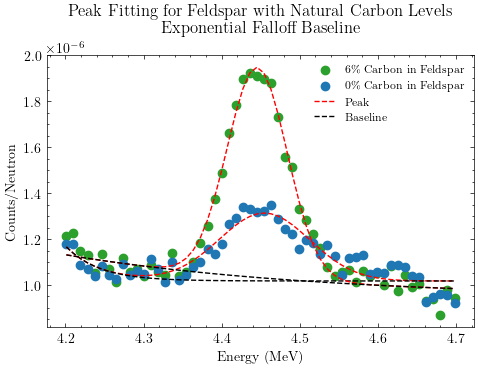

In [96]:
# %%
c_lines_df.columns
# filter to if the column contains 'Feldspar' or '7x7x7'
feldspar_columns = c_lines_df.filter(like='Feldspar').columns
seven_by_seven_columns = c_lines_df.filter(like='7x7x7').columns
both_columns = feldspar_columns.intersection(seven_by_seven_columns)

# %%
min_carbon_example_fitting_cols = ['7x7x7_Feldspar_001021 baseline', '7x7x7_Feldspar_001021 peak','7x7x7_Feldspar_001021 true',]
max_carbon_example_fitting_cols = ['7x7x7_C_0600_Feldspar_Fill_003142 baseline', '7x7x7_C_0600_Feldspar_Fill_003142 peak', '7x7x7_C_0600_Feldspar_Fill_003142 true']

# 140 mm wide, 90mm tall
# plt.rcParams['figure.figsize'] = [5.51, 3.54]
plt.figure(figsize=[5.51, 3.54])
# for col in min_carbon_example_fitting_cols:
# plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 true'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=1)
# plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 true'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=1)
plt.scatter(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 true'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=1, alpha=1)
plt.scatter(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 true'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=1, alpha=1)

plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 peak'], label='Peak', color='red', linestyle='--', alpha=1, linewidth=1)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 baseline'], label='Baseline', color='black', linestyle='--', alpha=1)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 peak'], color='red', linestyle='--', alpha=1, linewidth=1)
plt.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 baseline'], color='black', linestyle='--', alpha=1)
plt.legend(
    fontsize=8
    )
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts/Neutron')
plt.title('Peak Fitting for Feldspar with Natural Carbon Levels\nExponential Falloff Baseline')
plt.savefig(figure_folder+'peak_fitting_feldspar.png', bbox_inches='tight')
plt.show()

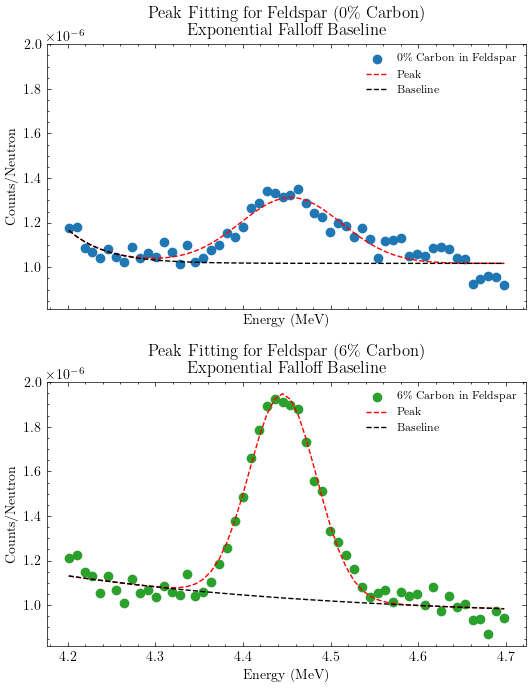

In [97]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[5.51, 7.08], sharex=True, sharey=True)

# 0% Carbon subplot
ax1.scatter(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 true'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=1, alpha=1)
ax1.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 peak'], label='Peak', color='red', linestyle='--', alpha=1, linewidth=1)
ax1.plot(c_lines_df.bins, c_lines_df['7x7x7_Feldspar_001021 baseline'], label='Baseline', color='black', linestyle='--', alpha=1)
ax1.set_xlabel('Energy (MeV)')
ax1.set_ylabel('Counts/Neutron')
ax1.set_title('Peak Fitting for Feldspar (0\% Carbon)\nExponential Falloff Baseline')
ax1.legend(fontsize=8)

# 6% Carbon subplot
ax2.scatter(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 true'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=1, alpha=1)
ax2.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 peak'], label='Peak', color='red', linestyle='--', alpha=1, linewidth=1)
ax2.plot(c_lines_df.bins, c_lines_df['7x7x7_C_0600_Feldspar_Fill_003142 baseline'], label='Baseline', color='black', linestyle='--', alpha=1)
ax2.set_xlabel('Energy (MeV)')
ax2.set_ylabel('Counts/Neutron')
ax2.set_title('Peak Fitting for Feldspar (6\% Carbon)\nExponential Falloff Baseline')
ax2.legend(fontsize=8)

plt.tight_layout()
plt.savefig(figure_folder+'peak_fitting_feldspar_subplots.png', bbox_inches='tight')
plt.show()


# Component Analysis

In [98]:
analysis_results['method group'].unique()

array(['Peak Fitting', 'Component Analysis', nan, 'Machine Learning'],
      dtype=object)

In [99]:
component_analysis_results = analysis_results[analysis_results['method group']=='Component Analysis']
component_analysis_results = component_analysis_results.sort_values(by=['mse'])
component_analysis_results = component_analysis_results[component_analysis_results['datasets used']=='Material Mixes']
component_analysis_results = component_analysis_results[component_analysis_results['carbon level'] == 'Agricultural']

In [100]:
all_results_table(component_analysis_results, focus=['method'])

| method                                |         mse |
|---------------------------------------|-------------|
| Component Analysis - Elemental Maps   | 0.00028756  |
| Component Analysis - Average Training | 0.000572678 |


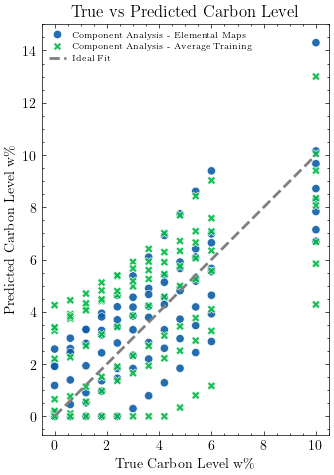

In [101]:
explode_and_graph(component_analysis_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_component_analysis.jpg',
                   hue='method',style='method')

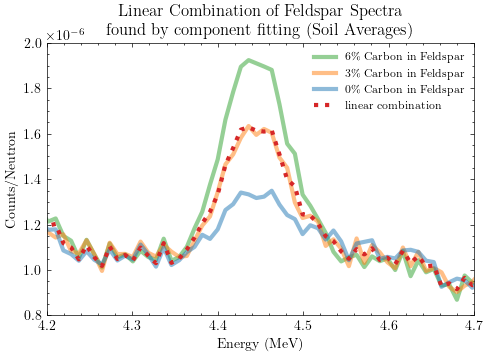

In [102]:
df = pd.read_pickle("../Data/DetectorReadings.pkl")
bins = df['bins'].values
_df = analysis_results[analysis_results['datasets used']=='Feldspar']
_df = _df[_df['method']=='Component Analysis - Average Training']

combined = (df['7x7x7_Feldspar_001021']*_df.iloc[0]['fitting_df'].loc['7x7x7_C_0300_Feldspar_Fill_003137']['average_min_carbon'])+(df['7x7x7_C_0600_Feldspar_Fill_003142']*_df.iloc[0]['fitting_df'].loc['7x7x7_C_0600_Feldspar_Fill_003142']['average_max_carbon'])

plt.figure(figsize=[5.51, 3.54])
plt.plot(bins, df['7x7x7_C_0600_Feldspar_Fill_003142'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
plt.plot(bins, df['7x7x7_C_0300_Feldspar_Fill_003137'], label='3\% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
plt.plot(bins, df['7x7x7_Feldspar_001021'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.plot(bins, combined, label='linear combination', color='tab:red', linewidth=3, linestyle='dotted')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts/Neutron')
plt.title('Linear Combination of Feldspar Spectra\nfound by component fitting (Soil Averages)')
plt.legend(fontsize=8)
plt.xlim(4.2, 4.7)
plt.ylim(8e-7, 2e-6)
plt.savefig(figure_folder+'linear_combination_feldspar.png', bbox_inches='tight')
plt.show()

In [103]:
detector_readings.columns

Index(['7x7x7_Si_001000', '7x7x7_Al_001001', '7x7x7_H_001002',
       '7x7x7_Na_001003', '7x7x7_O_001004', '7x7x7_Fe_001005',
       '7x7x7_Mg_001006', '7x7x7_C_001007', '7x7x7_SiO2_001008',
       '7x7x7_Al2O3_001009',
       ...
       '7x7x7_C_1000_Feldspar_Fill_003143',
       '7x7x7_C_2000_Feldspar_Fill_003144',
       '7x7x7_C_3000_Feldspar_Fill_003145',
       '7x7x7_C_4000_Feldspar_Fill_003146',
       '7x7x7_C_5000_Feldspar_Fill_003147',
       '7x7x7_C_6000_Feldspar_Fill_003148',
       '7x7x7_C_7000_Feldspar_Fill_003149',
       '7x7x7_C_8000_Feldspar_Fill_003150',
       '7x7x7_C_9000_Feldspar_Fill_003151', 'bins'],
      dtype='object', length=176)

In [104]:
detector_readings[['7x7x7_Si_001000', '7x7x7_Al_001001', '7x7x7_H_001002', '7x7x7_Na_001003', '7x7x7_O_001004', '7x7x7_Fe_001005', '7x7x7_Mg_001006', '7x7x7_C_001007']]

,7x7x7_Si_001000,7x7x7_Al_001001,7x7x7_H_001002,7x7x7_Na_001003,7x7x7_O_001004,7x7x7_Fe_001005,7x7x7_Mg_001006,7x7x7_C_001007
0,8.404120e-04,1.064090e-03,1.469400e-05,7.596800e-04,1.584100e-05,1.643980e-03,9.120430e-04,8.543980e-04
1,6.850000e-07,8.950000e-07,1.100000e-08,6.040000e-07,1.100000e-08,1.489000e-06,7.630000e-07,6.880000e-07
2,6.008020e-04,7.947000e-04,1.100900e-05,5.416380e-04,1.176700e-05,1.330060e-03,6.535110e-04,6.176260e-04
3,4.206310e-04,5.775430e-04,7.965000e-06,3.816200e-04,8.406000e-06,1.047290e-03,4.585130e-04,4.379550e-04
4,2.027580e-04,2.917970e-04,3.990000e-06,1.885240e-04,4.226000e-06,5.645540e-04,2.268500e-04,2.148290e-04
...,...,...,...,...,...,...,...,...
930,2.780000e-07,2.610000e-07,3.000000e-09,1.930000e-07,4.000000e-09,1.830000e-07,4.100000e-07,2.230000e-07
931,3.110000e-07,2.640000e-07,2.000000e-09,2.010000e-07,3.000000e-09,2.030000e-07,4.150000e-07,2.240000e-07
932,2.910000e-07,2.590000e-07,3.000000e-09,2.220000e-07,6.000000e-09,1.770000e-07,4.260000e-07,2.420000e-07
933,2.950000e-07,2.370000e-07,4.000000e-09,2.070000e-07,4.000000e-09,1.660000e-07,3.930000e-07,2.140000e-07


In [105]:
_df = analysis_results[analysis_results['datasets used']=='Feldspar']
_df = _df[_df['method']=='Component Analysis - Elemental Maps']
test = _df.iloc[0]

In [106]:
test['fitting_df'].loc['7x7x7_C_0300_Feldspar_Fill_003137'].sort_values()

7x7x7_C_001007     0.125
7x7x7_H_001002     0.125
7x7x7_O_001004     0.125
7x7x7_Fe_001005    0.125
7x7x7_Na_001003    0.125
7x7x7_Al_001001    0.125
7x7x7_Mg_001006    0.125
7x7x7_Si_001000    0.125
Name: 7x7x7_C_0300_Feldspar_Fill_003137, dtype: float64

In [107]:
w_df = test['fitting_df'].loc['7x7x7_C_0300_Feldspar_Fill_003137'].sort_values()
weights = w_df.values

In [108]:
unweighted_spectrums = df[test['fitting_df'].loc['7x7x7_C_0300_Feldspar_Fill_003137'].index].values.T

In [109]:
weighted_spectrums = np.multiply(weights, unweighted_spectrums.T).T

In [110]:
summed_spectrum = np.matmul(weights, unweighted_spectrums)

In [111]:

weights/np.linalg.norm(weights)

array([0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
       0.35355339, 0.35355339, 0.35355339])

In [129]:
# find index of 4.44
index_4_44 = np.where(bins < 4.44)[0][-1]
order = weighted_spectrums[:, index_4_44].argsort()[::-1]
elem_names = ['Si', 'Al', 'H', 'Na', 'O', 'Fe', 'Mg', 'C']

In [ ]:
# a color palette for the stackplot
colors = plt.cm.tab10.colors

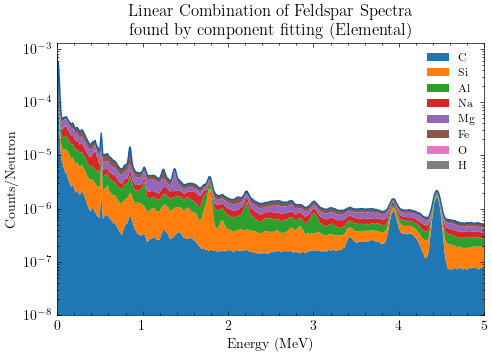

In [131]:
plt.figure(figsize=[5.51, 3.54])
plt.plot(bins, summed_spectrum)
# for spectrum in weighted_spectrums:
#     plt.plot(bins, spectrum)
# make a stackplot instead
plt.stackplot(bins, weighted_spectrums[order], labels=np.array(elem_names)[order], colors=plt.cm.tab10.colors)
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts/Neutron')
plt.title('Linear Combination of Feldspar Spectra\nfound by component fitting (Elemental)')
plt.legend(fontsize=8)
plt.yscale('log')
plt.xlim(0, 5)
plt.savefig(figure_folder+'elemental_linear_combination_feldspar.png', bbox_inches='tight')
plt.show()

In [121]:
index_4_44

np.int64(492)

In [123]:
weighted_spectrums[:, index_4_44].argsort()

array([2, 4, 5, 6, 3, 1, 0, 7])

# Convex Optimization

In [47]:
analysis_results.method.unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [48]:
convex_optimization_results = analysis_results[analysis_results['method']=='Convex Optimization']
convex_optimization_results = convex_optimization_results.sort_values(by=['mse'])
convex_optimization_results = convex_optimization_results[convex_optimization_results['datasets used']=='Material Mixes']
convex_optimization_results = convex_optimization_results[convex_optimization_results['carbon level'] == 'Agricultural']

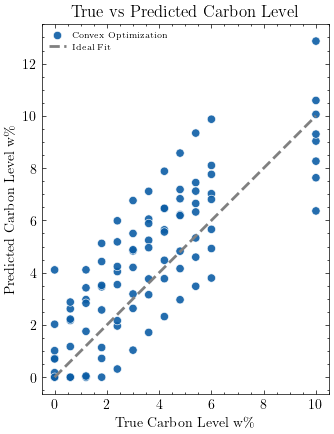

In [49]:
explode_and_graph(convex_optimization_results, 'true_carbon', 'predicted_carbon', 
                   'True vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_convex_optimization.jpg',
                   hue='method', style='method')

In [50]:
all_results_table(convex_optimization_results, focus=['method'])


| method              |         mse |
|---------------------|-------------|
| Convex Optimization | 0.000357869 |


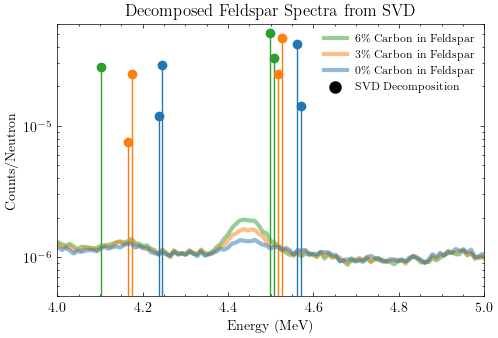

In [51]:
example_decomposed_df = analysis_results[analysis_results.method == 'Convex Optimization'].iloc[0]['decomposed_df'].T

# %%
example_decomposed_df

# %%
_df = _df[_df['method']=='Component Analysis - Average Training']

# %%
plt.figure(figsize=[5.51, 3.54])
plt.plot(bins, df['7x7x7_C_0600_Feldspar_Fill_003142'], label='6\% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_C_0600_Feldspar_Fill_003142'],'tab:green')
plt.plot(bins, df['7x7x7_C_0300_Feldspar_Fill_003137'], label='3\% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_C_0300_Feldspar_Fill_003137'], 'tab:orange')
plt.plot(bins, df['7x7x7_Feldspar_001021'], label='0\% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.stem(example_decomposed_df.index, example_decomposed_df['7x7x7_Feldspar_001021'], 'tab:blue')
# make empty lines for legend
# plt.plot([], [], label='6% Carbon in Feldspar', color='tab:green', linewidth=3, alpha=0.5)
# plt.plot([], [], label='3% Carbon in Feldspar', color='tab:orange', linewidth=3, alpha=0.5)
# plt.plot([], [], label='0% Carbon in Feldspar', color='tab:blue', linewidth=3, alpha=0.5)
plt.scatter([], [], label='SVD Decomposition', color='black', linewidth=3, alpha=1)

plt.xlabel('Energy (MeV)')
plt.ylabel('Counts/Neutron')
plt.title('Decomposed Feldspar Spectra from SVD')
plt.legend(fontsize=8)
plt.yscale('log')
# plt.xlim(4.2, 4.7)
plt.xlim(4, 5)
plt.ylim(5e-7, 6e-5)
plt.savefig(figure_folder+'decomposed_feldspar_svd.jpg', bbox_inches='tight')
plt.show()

# Deep Learning

In [58]:
analysis_results.method.unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [59]:
analysis_results['method'].unique()

array(['Baseline and Peak Fitting - linear Baseline',
       'Baseline and Peak Fitting - Exponential Falloff Baseline',
       'Component Analysis - Average Training',
       'Component Analysis - Elemental Maps', 'Convex Optimization',
       'Machine Learning', 'Filtered Machine Learning'], dtype=object)

In [60]:

ml_optimization_results = analysis_results[analysis_results['method']=='Machine Learning']
ml_optimization_results = ml_optimization_results.sort_values(by=['mse'])
# ml_optimization_results = ml_optimization_results[ml_optimization_results['datasets used']=='Material Mixes']
ml_optimization_results = ml_optimization_results[ml_optimization_results['carbon level'] == 'Agricultural']

In [61]:
ml_optimization_results

,mse,r2,slope,intercept,fitting_df,carbon_fitting_df,si_fitting_df,c_lines_df,si_lines_df,peak_areas,...,training_carbon_portions,test_carbon_portions,decomposed_df,history,training_x,training_y,test_x,test_y,x_hat,id
26,0.000704,0.024444,2.459024,-0.042038,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[0.015347032, 0.030670315, 0.03072429, 0.03108...","[0.0, 0.005999999999999998, 0.0119999999999999...","[0.031920433, 0.031920493, 0.031920813, 0.0319...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005...","[0.0, 0.03338085386558079, 0.03351358149997729...",26
12,0.001070,0.117902,-226.732179,2.531507,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[0.011235258, 0.010956001, 0.010942103, 0.0109...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.100...","[0.011235258, 0.010956001, 0.010942103, 0.0109...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005...","[0.0, 0.04742932846178727, 0.05058026986914887...",12
40,0.004767,1.000000,-99512.680630,-246.822057,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<keras.src.callbacks.history.History object at...,"[-0.0024803076, -0.0024813125]","[0.0, 0.10000000000000063]","[-0.0024803076, -0.0024813279, -0.0024813737, ...","[0.0, 0.005999999999999998, 0.0119999999999999...","[0.0, 0.09999999999999432, 0.10152919369787128...",40


In [62]:
all_results_table(ml_optimization_results, focus=['method'])

| method           |         mse |
|------------------|-------------|
| Machine Learning | 0.000704499 |
| Machine Learning | 0.00106982  |
| Machine Learning | 0.00476667  |


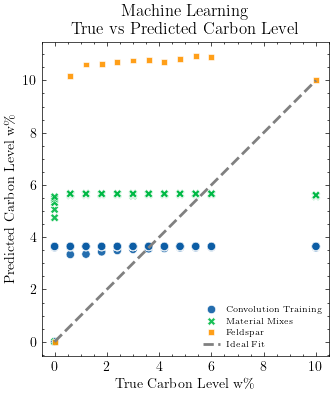

In [66]:
explode_and_graph(ml_optimization_results, 'true_carbon', 'predicted_carbon', 
                   'Machine Learning\nTrue vs Predicted Carbon Level',
                   'True Carbon Level w\%', 'Predicted Carbon Level w\%',
                   'carbon_level_vs_predicted_ml_optimization.jpg',
                   hue='datasets used', style='datasets used')
                   